In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we can see that 3 columns are object datatype, 2 are int64 and 9 columns are float64 datatype

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Here we can see that there is no null values in the dataset and total no. of rows are 18249

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

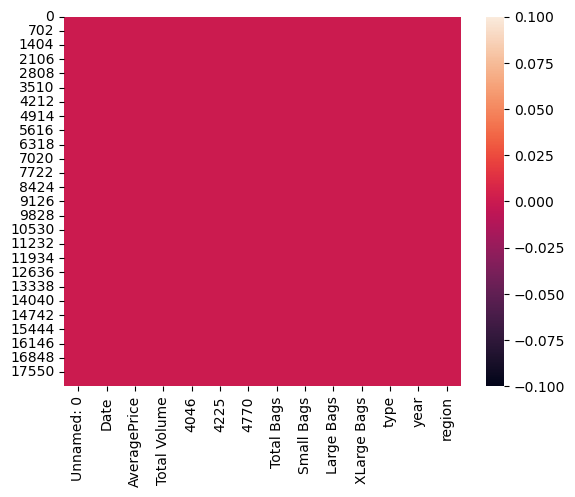

In [8]:
sns.heatmap(df.isnull())

Above we can clearly see that there are no null values in the dataset.

In [9]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [10]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Since Unnamed column is the serial number as per the region, we can drop it.

In [11]:
df=df.drop('Unnamed: 0',axis=1)

In [12]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Here we can see that mean is greater than median in Unnamed:0,Average Price, Total Volume,4225,4770,Large Bags,XL Bags have mean greater than median which might indicate that there is positive skewness present in the dataset.
Moreover, in columns 4046,Total Bags, Small Bags median is greater than mean which might indicate the  presence of negative skewness.
Also inXL bags the max value is very high when compared to 75th percentile which indicates the presence of outliers.

In [15]:
#Separating numerical and catagorical columns:
#Checking for catagorical column:
categorical=[]
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    else:
        numerical.append(i)
print("Categorical Columns :",categorical)
print("Numerical Columns :",numerical)
        

Categorical Columns : ['Date', 'type', 'region']
Numerical Columns : ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


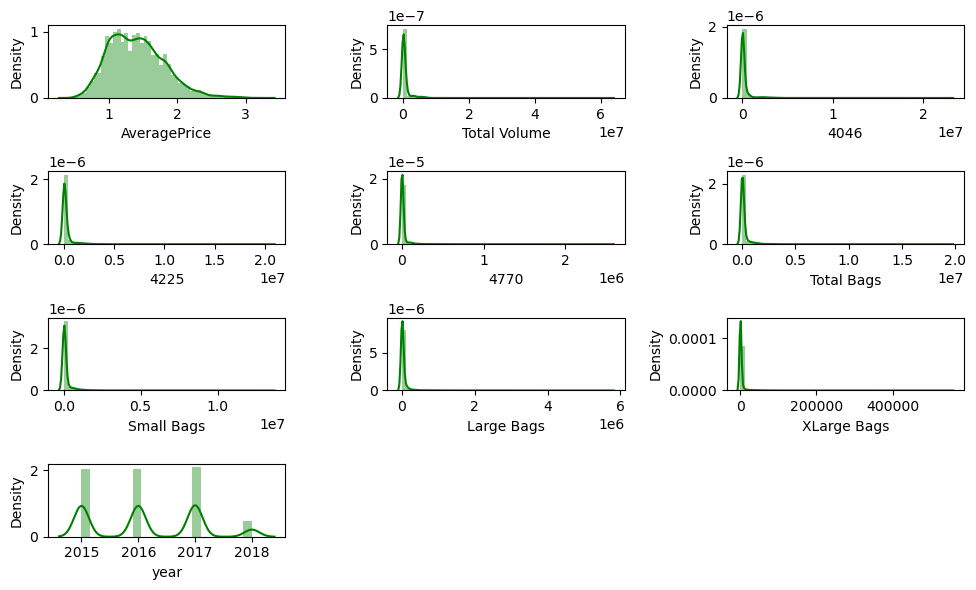

In [16]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above we can clearly see that all of our numerical data is positively skewed except year and Unnamed:0

type
conventional    9126
organic         9123
dtype: int64

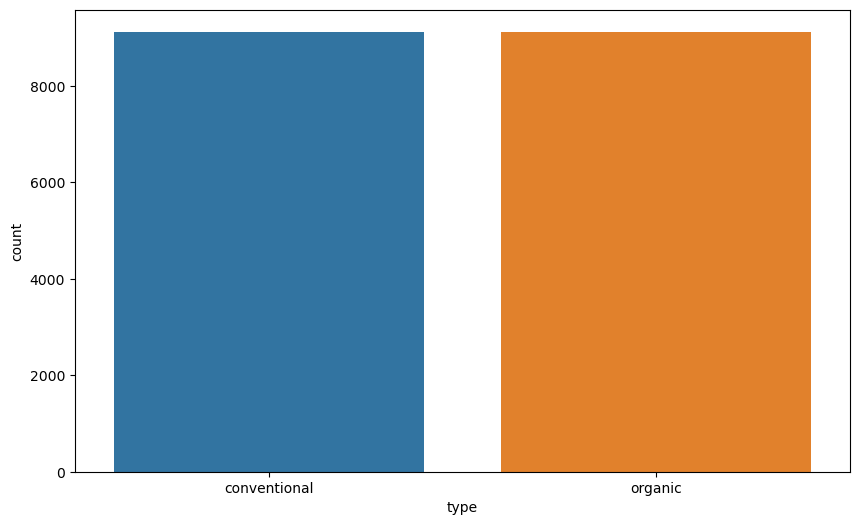

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='type',data=df)
df.value_counts('type')

Above count plot shows that the number of conventional and organic avocados is almost the same in the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

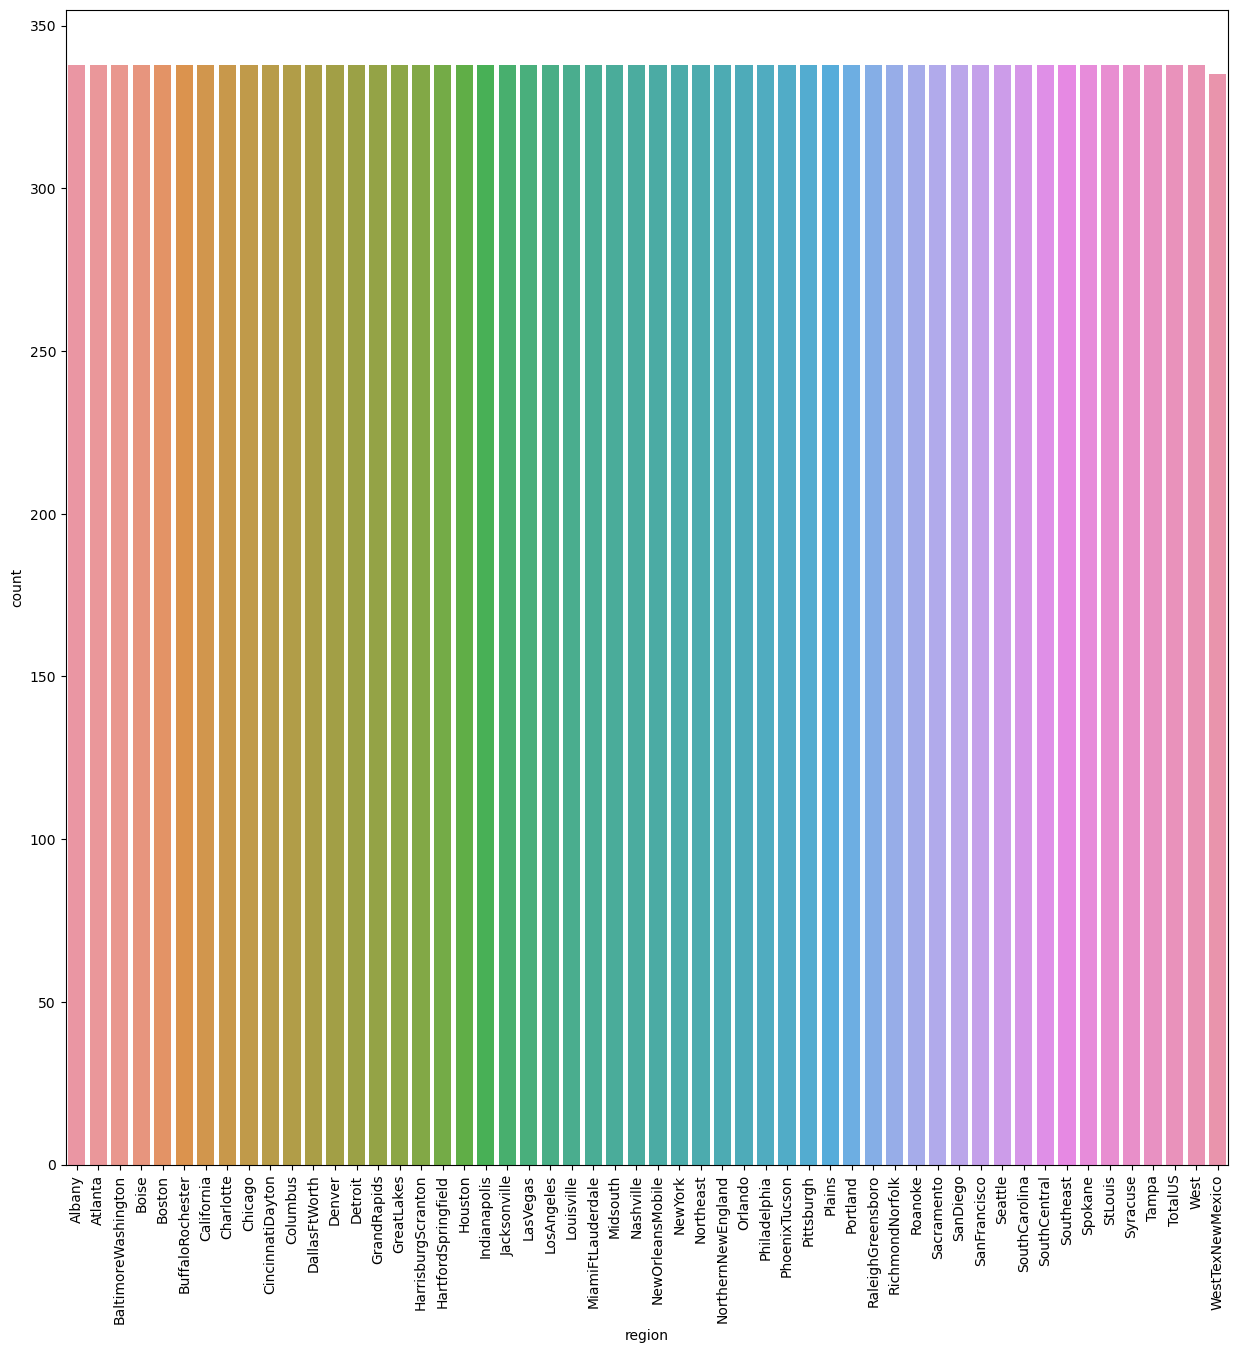

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(x='region',data=df)
df.value_counts('region')
plt.xticks(rotation=90)

Above graph shows that the observation takesn from each region is same almost.

year
2017    5722
2016    5616
2015    5615
2018    1296
dtype: int64

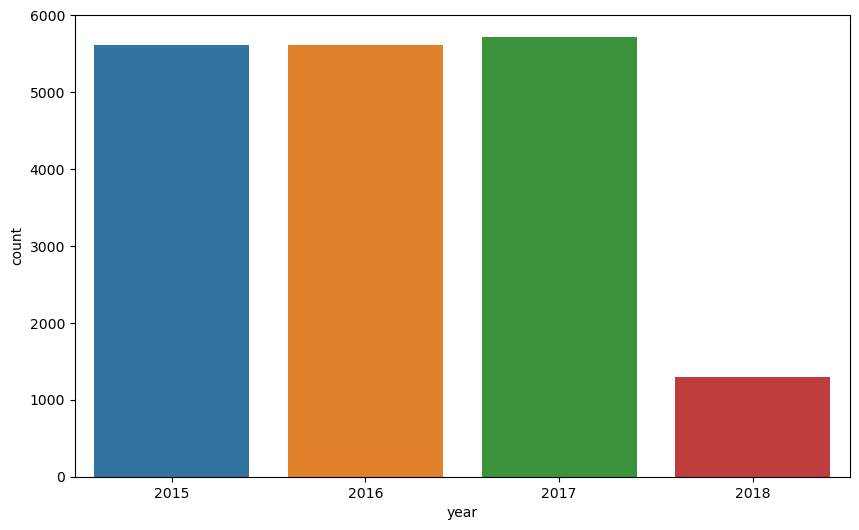

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='year',data=df)
df.value_counts('year')

The highest number of observations have been taken in 2017 and least number of observations were taken in the year 2018

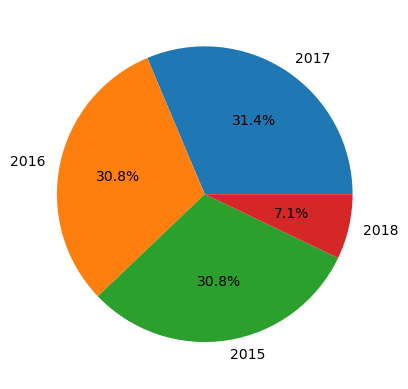

In [20]:
x = df['year'].value_counts() 
plt.pie(x.values, 
        labels=x.index, 
        autopct='%1.1f%%') 
plt.show() 

Above pie chart shows the % of avocado data gathered . 2017 has the highest observations

Let us convert the date datatype column into datetime datatype

In [21]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df['Month']=df['Date'].dt.month
df['date']=df['Date'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  date          18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

Here we can see that we have changed the datatype of date to datetime from object and added month and date columns that we extracted from Date. Now we can drop Date column.


In [22]:
df=df.drop('Date',axis=1)

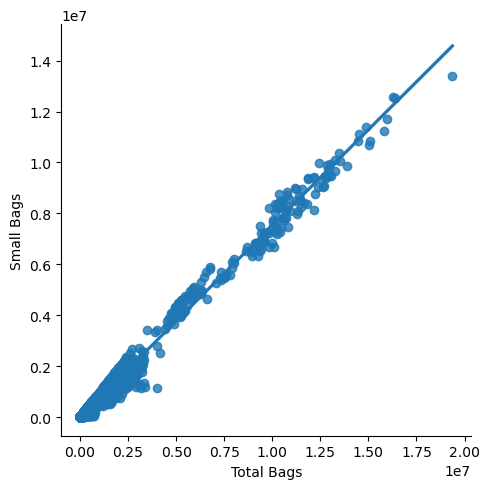

In [23]:
sns.lmplot(x='Total Bags',y='Small Bags',data=df)

Above lm plot shows strong positive correlation between Total Bags and Small Bags. Also we can clearly see that all the datapoint are close to the best fit line.

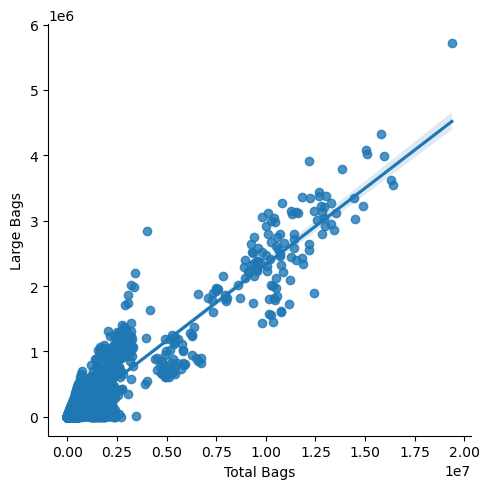

In [24]:
sns.lmplot(x='Total Bags',y='Large Bags',data=df)

Above lm plot shows positive correlation between Total Bags and Large Bags but it is not as strong as Total Bags and Small Bags. Moreover the datapoints are scattered  around the best fit line

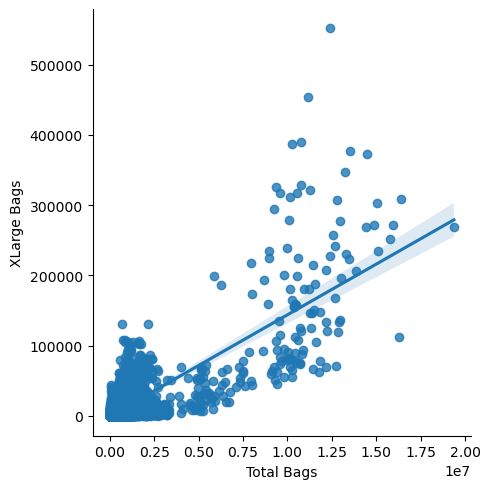

In [25]:
sns.lmplot(x='Total Bags',y='XLarge Bags',data=df)

Again here we can see thatXLarge bags and Total Bags are positively correlated but theirred to Small and Large Bags. ALso teh Data points are scattered across teh best fit line and even few are far from it. npositive correlation is weak as compa

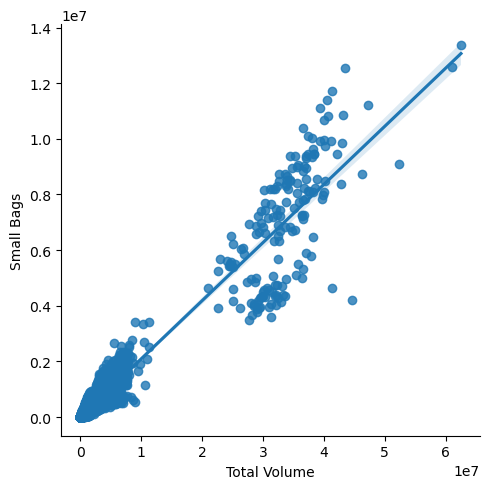

In [26]:
sns.lmplot(x='Total Volume',y='Small Bags',data=df)

Above lm plot shows a strong positive relation between Total Volume and Small Bags and most of the datapoints are close to the best fit line.

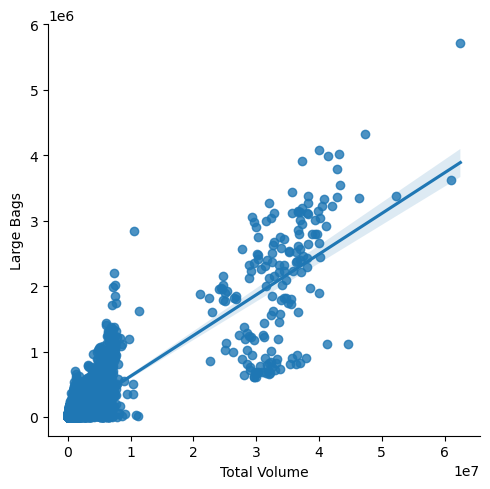

In [27]:
sns.lmplot(x='Total Volume',y='Large Bags',data=df) 

here we can see positive correlation between Large bags and total volume but the data point are not as close to the best fit line as in small bags.

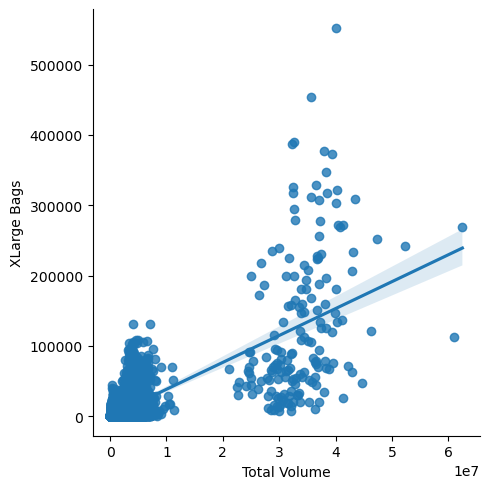

In [28]:
sns.lmplot(x='Total Volume',y='XLarge Bags',data=df)

here we can see a positive correlation but not that strong as in small or large bags.

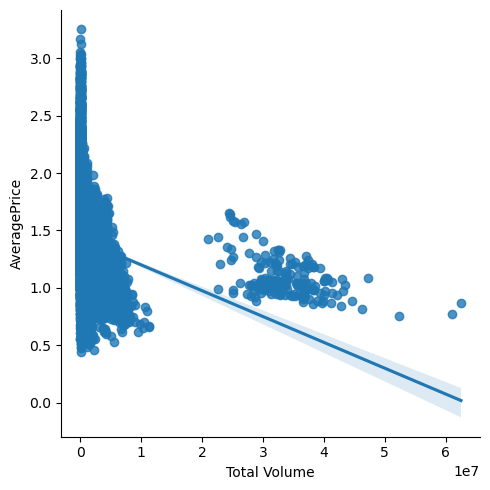

In [29]:
sns.lmplot(y='AveragePrice',x='Total Volume',data=df)

Here we can see that As teh Total Volume increases the average price decreases which means that Total volume nad Average proce are negatively correlated

<Axes: xlabel='type', ylabel='AveragePrice'>

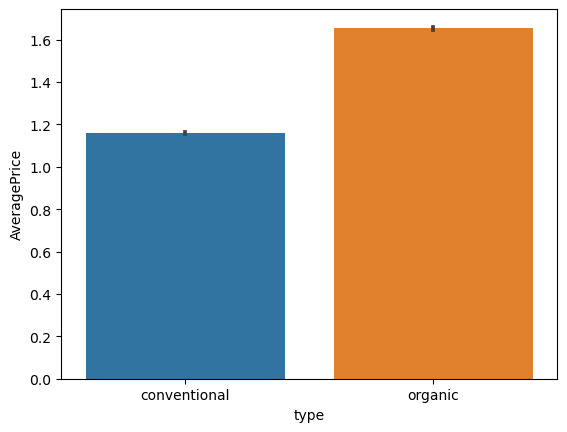

In [30]:
sns.barplot(x='type',y='AveragePrice',data=df)

Above graph shows that the average price of conventional avocado is less than organic avocado.

<Axes: xlabel='type', ylabel='Total Volume'>

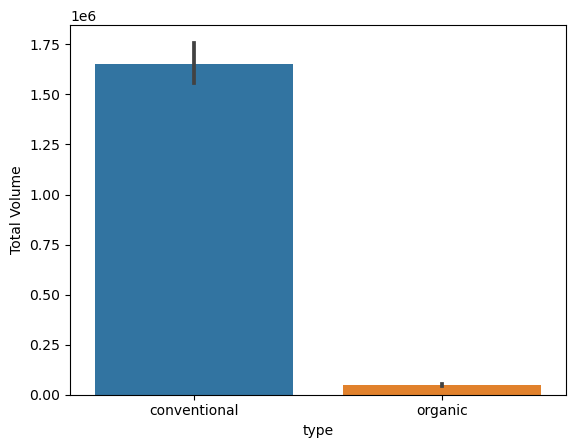

In [31]:
sns.barplot(x='type',y='Total Volume',data=df)

Above graph shows that the total volume of conventionalavocado is way higher than organic avocado.

<Axes: xlabel='type', ylabel='Total Bags'>

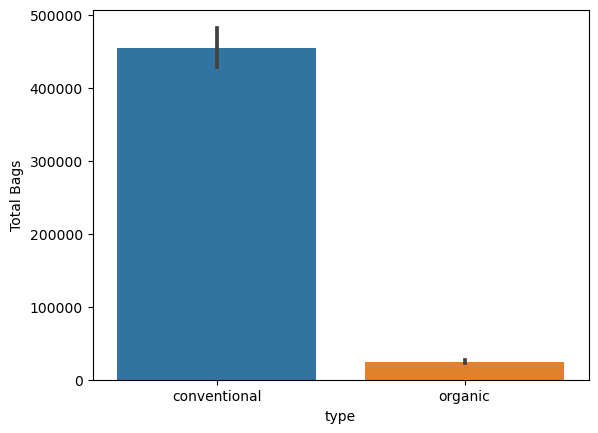

In [32]:
sns.barplot(x='type',y='Total Bags',data=df)

Above graph shows that the total bags of conventional avocado is higher than total bags of organic avocado

<Axes: xlabel='type', ylabel='4046'>

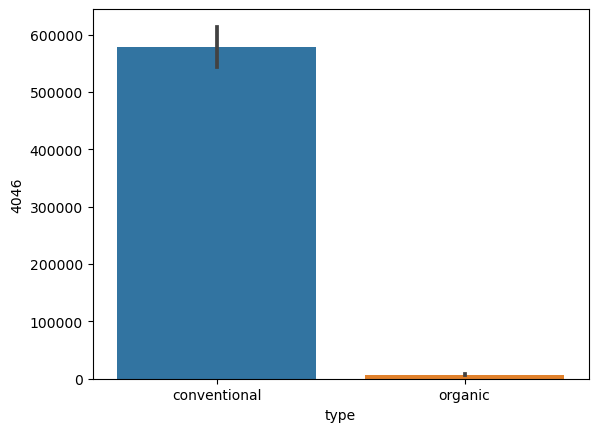

In [33]:
sns.barplot(x='type',y='4046',data=df)

<Axes: xlabel='type', ylabel='4225'>

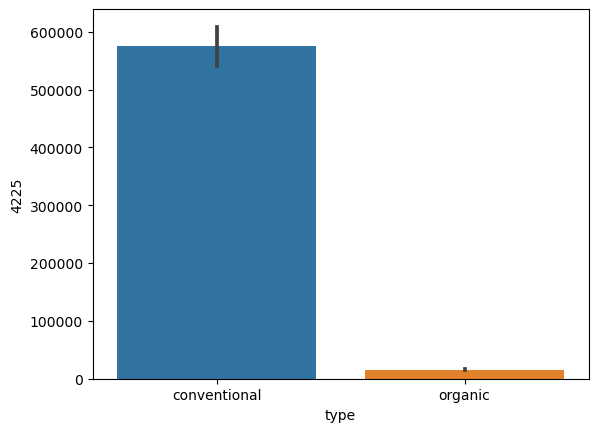

In [34]:
sns.barplot(x='type',y='4225',data=df)

<Axes: xlabel='type', ylabel='4770'>

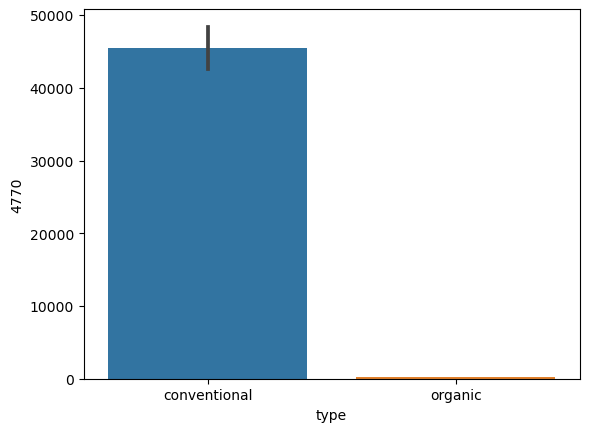

In [35]:
sns.barplot(x='type',y='4770',data=df)

In above 3 graphs we can clearly see that Organic is very low as compared to conventional avocado. Moreover the sale of 4770 is least among all the 3 variants.

<Axes: xlabel='Month', ylabel='Total Volume'>

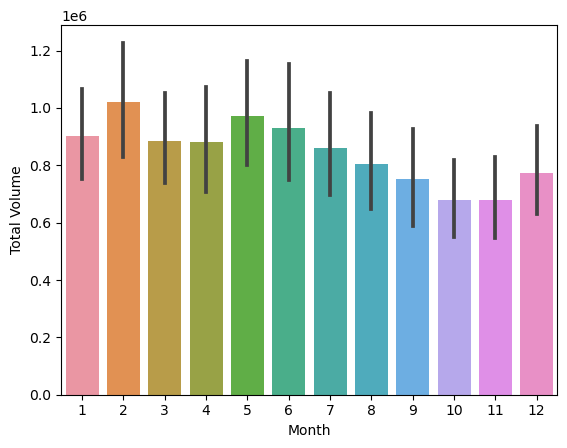

In [36]:
sns.barplot(x='Month',y='Total Volume',data=df)

Above we can see that the highest volume sale is in the month of February followed by May

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'HartfordSpringfield'),
  Text(1, 0, 'SanFrancisco'),
  Text(2, 0, 'NewYork'),
  Text(3, 0, 'Philadelphia'),
  Text(4, 0, 'Sacramento'),
  Text(5, 0, 'Charlotte'),
  Text(6, 0, 'Northeast'),
  Text(7, 0, 'Albany'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'RaleighGreensboro'),
  Text(10, 0, 'BaltimoreWashington'),
  Text(11, 0, 'Boston'),
  Text(12, 0, 'Syracuse'),
  Text(13, 0, 'BuffaloRochester'),
  Text(14, 0, 'HarrisburgScranton'),
  Text(15, 0, 'Jacksonville'),
  Text(16, 0, 'Orlando'),
  Text(17, 0, 'GrandRapids'),
  Text(18, 0, 'NorthernNewEngland'),
  Text(19, 0, 'Spokane'),
  Text(20, 0, 'Seattle'),
  Text(21, 0, 'Plains'),
  Text(22, 0, 'StLouis'),
  Text(23, 0, 'MiamiFtLauderdale'),
  Text(24, 0, 'Tampa'),
  Text(25, 0,

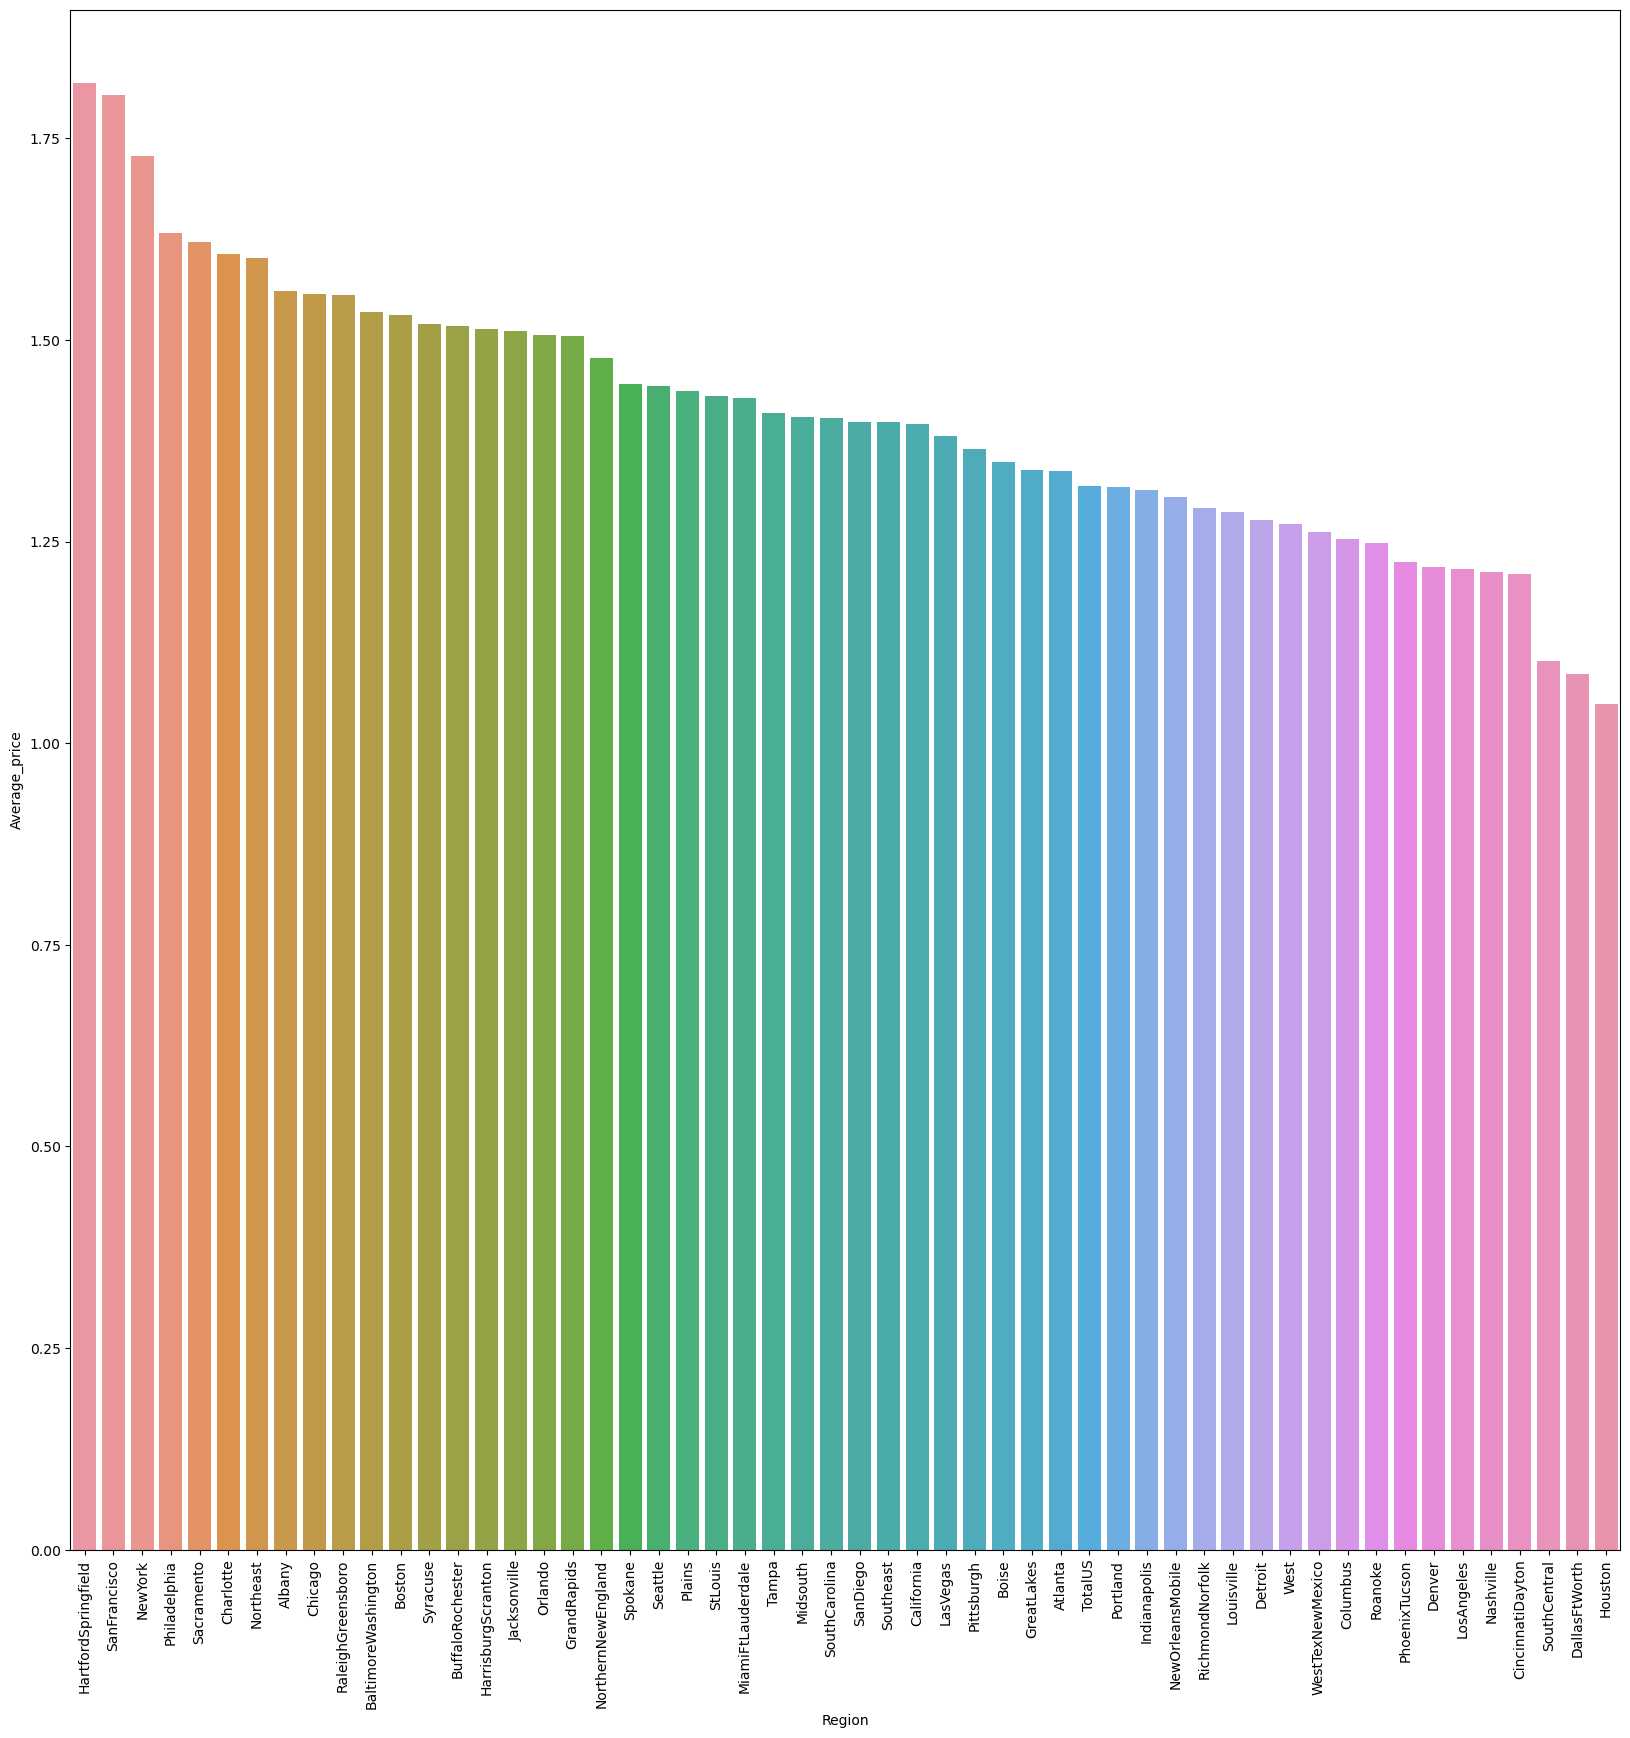

In [37]:
Region=[]
Average_price=[]
for i in df['region']:
    Region.append(i)

for i in Region:
    x=df[df.region==i]
    Region_Average=sum(x.AveragePrice)/len(x)
    Average_price.append(Region_Average)
dfnew=pd.DataFrame({'Region':Region,'Average_price':Average_price})
    
plt.figure(figsize=(20,20))
new_index=dfnew.Average_price.sort_values(ascending=False).index.values
sorted_data=dfnew.reindex(new_index)
sns.barplot(x=sorted_data.Region,y=sorted_data.Average_price)
plt.xticks(rotation=90)

In the above graph we can see the region with average price of avocado from high to low.Highest average price is in Hartfordspringfield followed by SanFrancisco

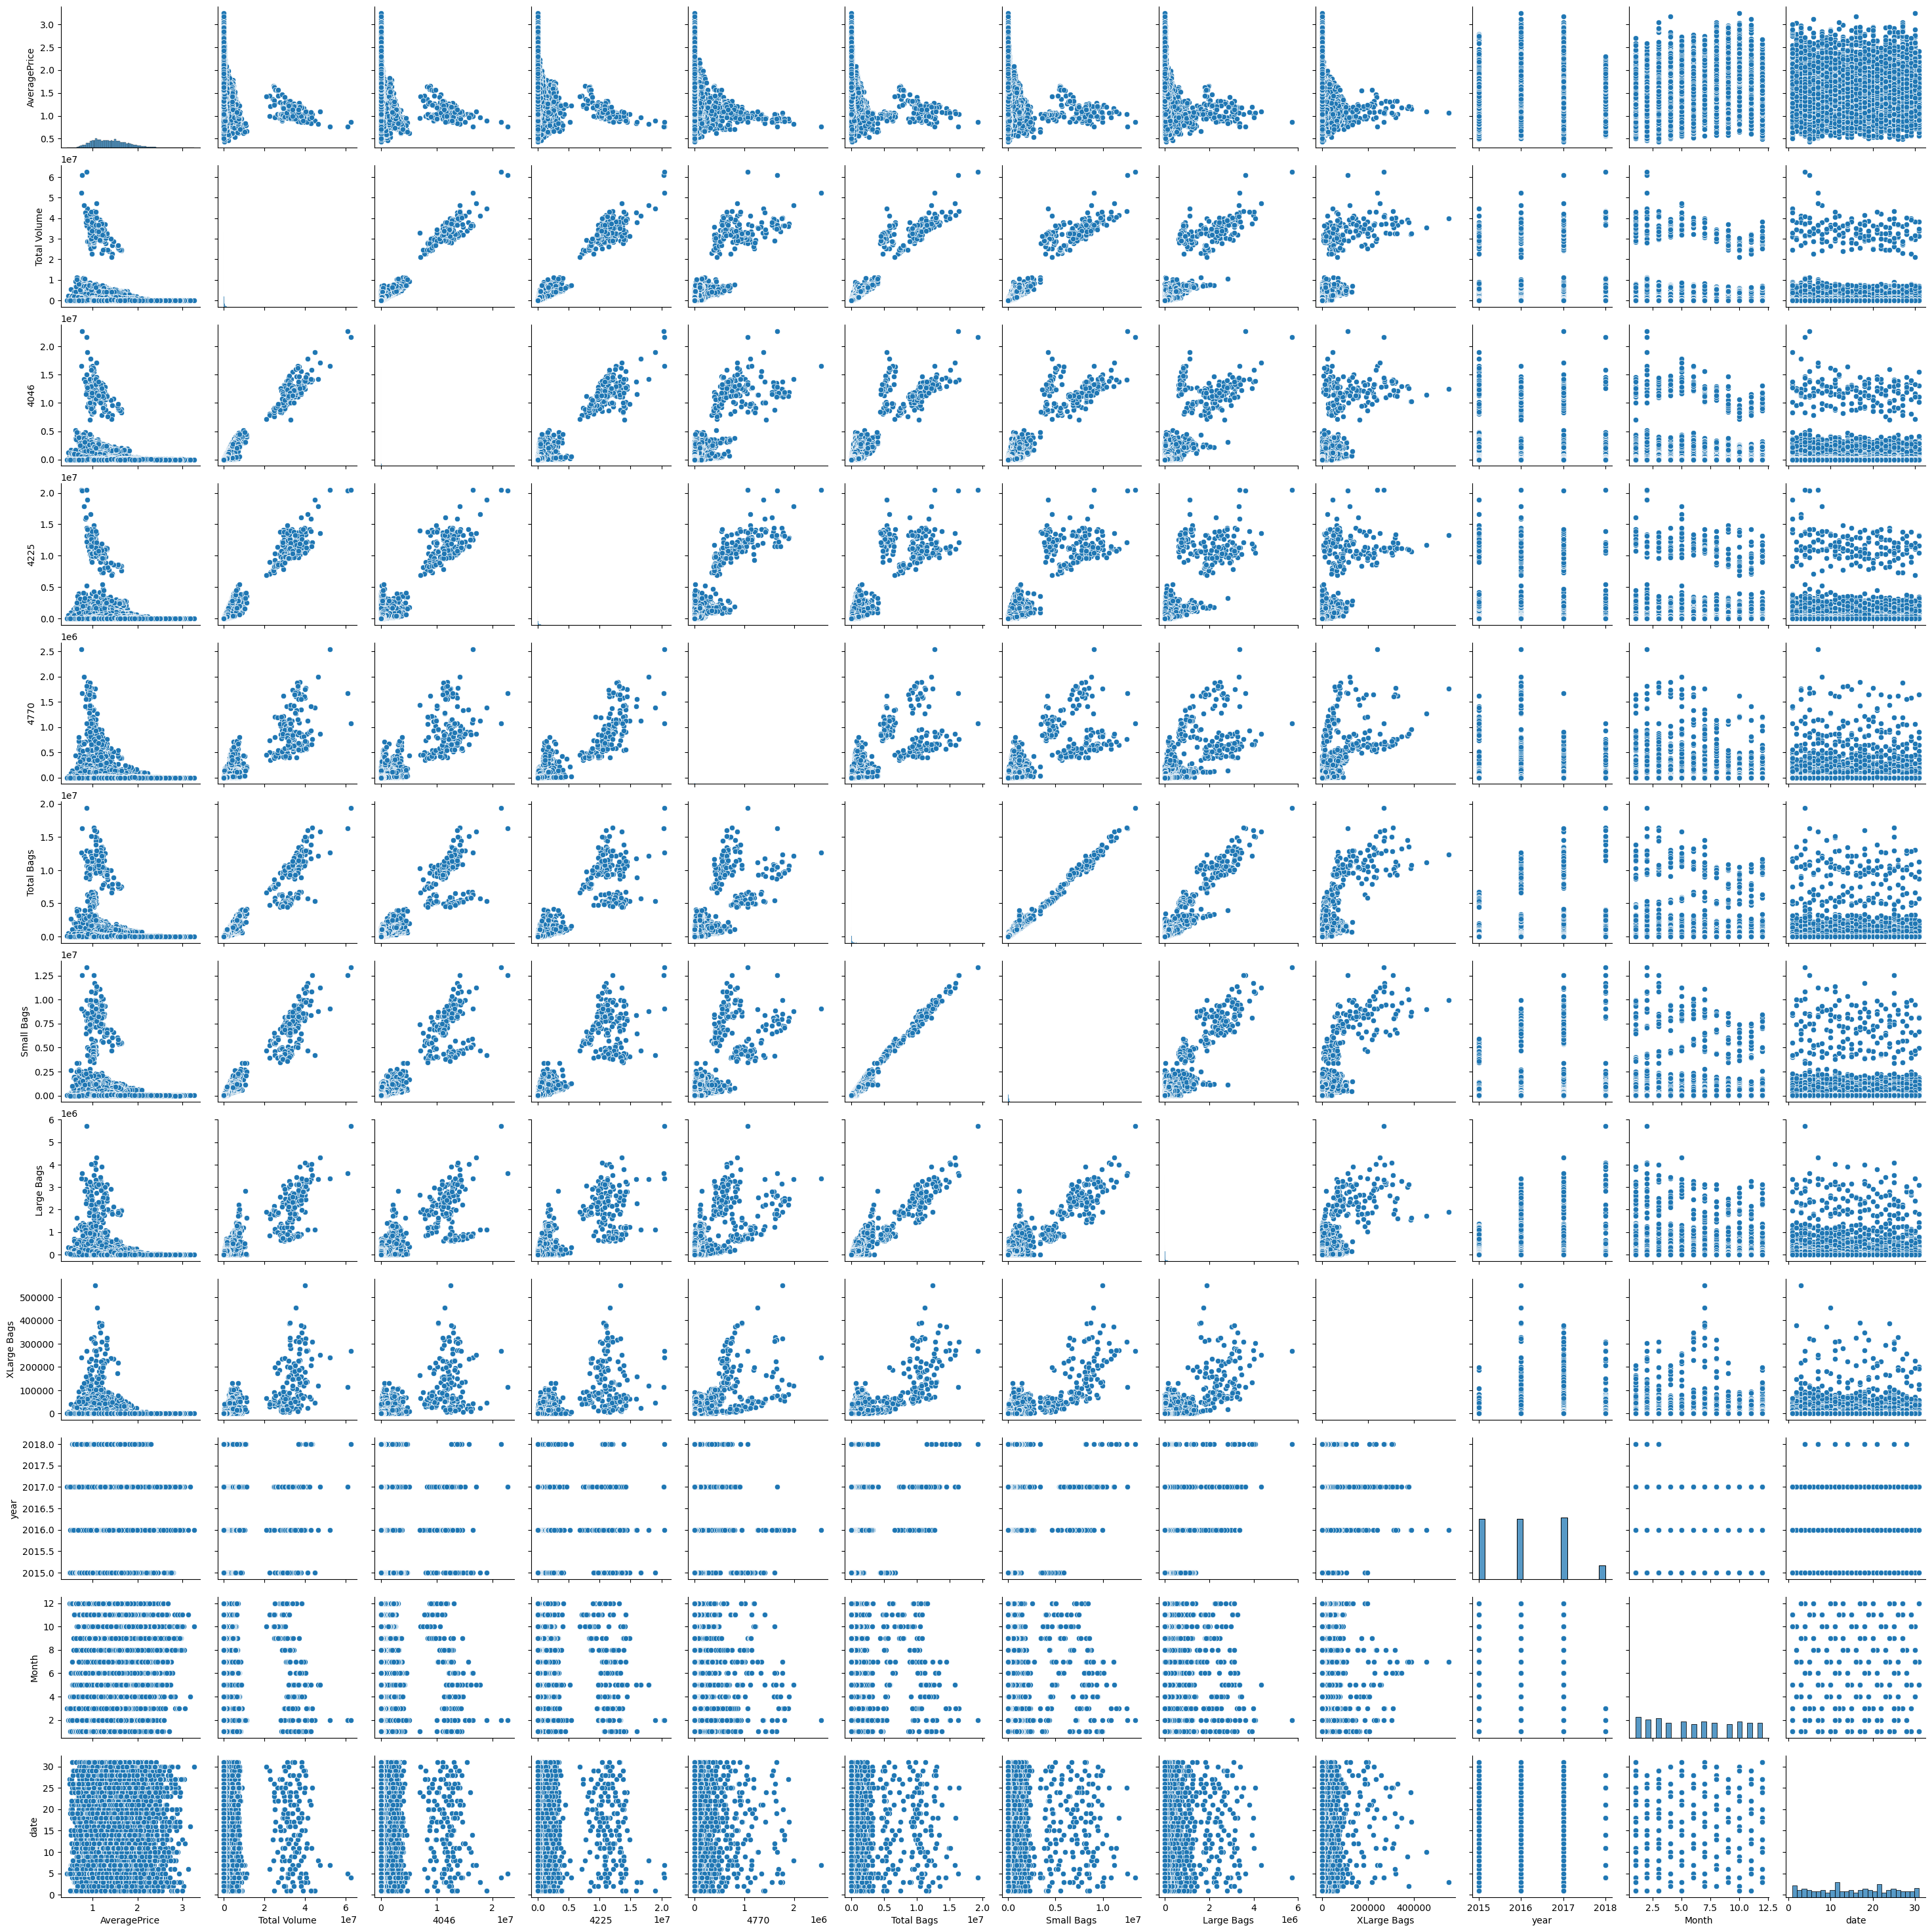

In [38]:
sns.pairplot(df)

In above plots we can see that Total volume has strong positive correlation with 4046 and little less with 4025 and least positive correlation with 4770.
Total Bags has strong positive correlation with small bags, a liitle less with Large bags and least with xlarge bags. 
Total volume has positive correlation with total bags, small bags, large bags and xlarge bags
Total bags has positive correlation with 4025,4045 and 4770

In [39]:
dfcor=df.corr()

<Axes: >

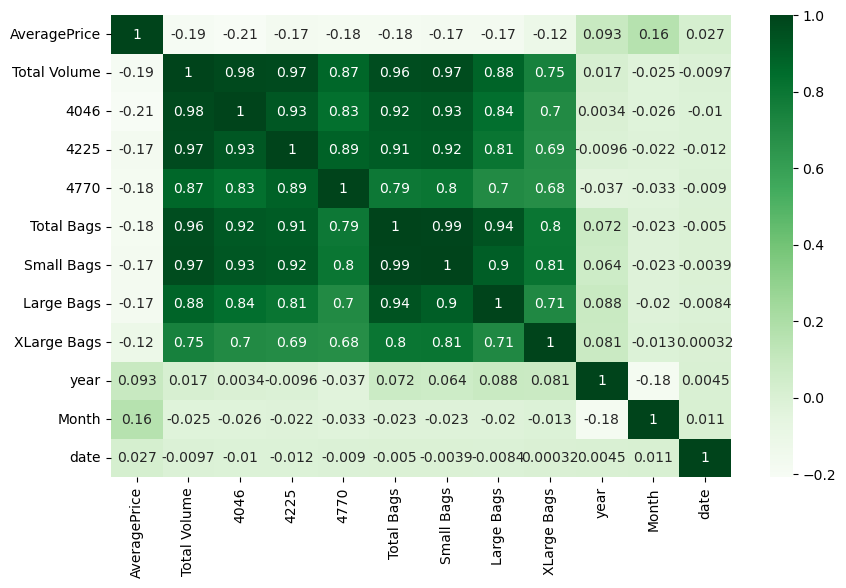

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True,cmap='Greens')

Here we can see that Average price is not very much correlated with any column
There is a very strong correlation between Total Bags and Small Bags,total bags and total volumeTotal Bags and Large bags
Small bags is strongly positively correlated to total volume.
4046 and 4225 and strong positively correlated to total volume

AveragePrice       Axes(0.125,0.653529;0.168478x0.226471)
Total Volume    Axes(0.327174,0.653529;0.168478x0.226471)
4046            Axes(0.529348,0.653529;0.168478x0.226471)
4225            Axes(0.731522,0.653529;0.168478x0.226471)
4770               Axes(0.125,0.381765;0.168478x0.226471)
Total Bags      Axes(0.327174,0.381765;0.168478x0.226471)
Small Bags      Axes(0.529348,0.381765;0.168478x0.226471)
Large Bags      Axes(0.731522,0.381765;0.168478x0.226471)
XLarge Bags            Axes(0.125,0.11;0.168478x0.226471)
year                Axes(0.327174,0.11;0.168478x0.226471)
Month               Axes(0.529348,0.11;0.168478x0.226471)
date                Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

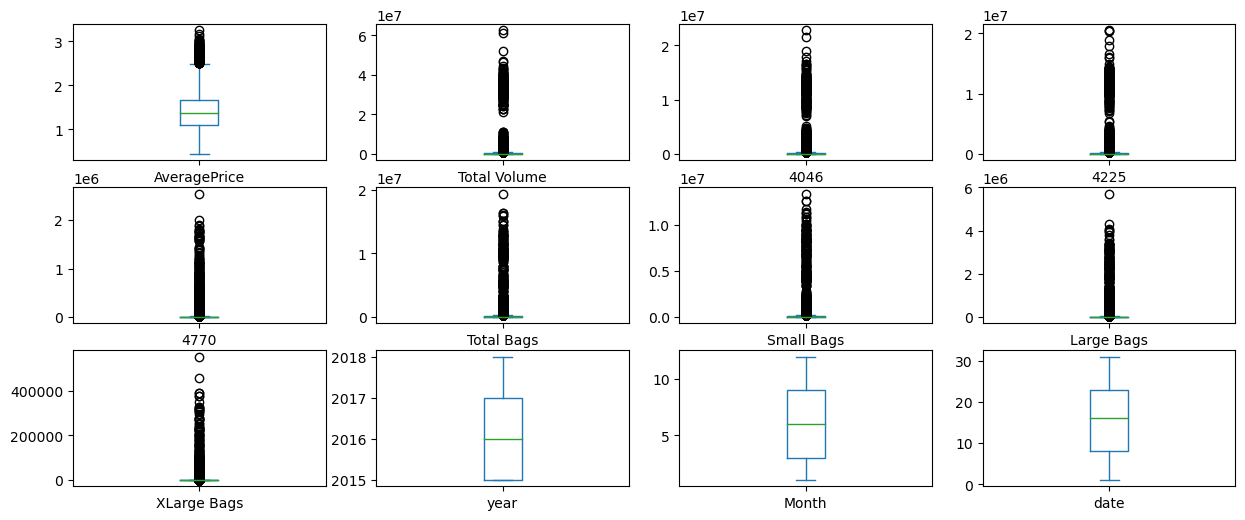

In [41]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,6))

Above boxplot shows the presence of outliers in all except year and unnamed

In [42]:
#Now we will remove outliers
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(df[['AveragePrice','Total Volume','XLarge Bags','Large Bags','Small Bags','Total Bags','4770','4225','4046']]))

In [44]:
z

,AveragePrice,Total Volume,XLarge Bags,Large Bags,Small Bags,Total Bags,4770,4225,4046
0,0.188689,0.227716,0.17558,0.222352,0.232647,0.234170,0.212091,0.199902,0.230816
1,0.139020,0.230427,0.17558,0.222335,0.231568,0.233350,0.211997,0.208054,0.231103
2,1.182069,0.212085,0.17558,0.222311,0.233399,0.234730,0.211325,0.154478,0.231007
3,0.809551,0.223444,0.17558,0.222186,0.236568,0.237096,0.211864,0.185350,0.230741
4,0.312861,0.231538,0.17558,0.221924,0.236154,0.236718,0.211834,0.208719,0.230891
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.17558,0.220964,0.226665,0.229301,0.212540,0.243857,0.230017
18245,0.755023,0.242296,0.17558,0.221403,0.232196,0.233594,0.212540,0.242277,0.230693
18246,1.152375,0.242331,0.17558,0.222561,0.231644,0.233463,0.205766,0.243090,0.230693
18247,1.301382,0.241625,0.17558,0.222529,0.229543,0.231866,0.205774,0.242651,0.230428


In [45]:
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([8, 8, 2, ..., 0, 0, 0], dtype=int64))

In [46]:
df1=df[(z<3).all(axis=1)]

In [47]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [48]:
print("Data Loss=", (df.shape[0]-df1.shape[0])/df.shape[0])

Data Loss= 0.03276891884486821


We can see that the data loss is very small

In [49]:
#Encoding categorical columns df
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
        
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,14


In [50]:
#Now we will check for skewness df
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

In [51]:
from scipy.stats import boxcox

In [52]:
df1['Total Volume']=boxcox(df1['Total Volume'],.5)
#3

In [53]:
df1['4046']=boxcox(df1['4046'],.5)
#3

In [54]:
df1['4225']=boxcox(df1['4225'],.5)
#3

In [55]:
df1['4770']=boxcox(df1['4770'],.5)
#3

In [56]:
df1['Total Bags']=boxcox(df1['Total Bags'],.5)
#3

In [57]:
df1['Small Bags']=boxcox(df1['Small Bags'],.5)
#3

In [58]:
df1['Large Bags']=boxcox(df1['Large Bags'],.5)
#3

In [59]:
df1['XLarge Bags']=boxcox(df1['XLarge Bags'],.5)
#3

In [60]:
df1.skew()

AveragePrice    0.377432
Total Volume    1.963864
4046            2.497504
4225            2.128505
4770            2.636658
Total Bags      2.010691
Small Bags      2.093752
Large Bags      2.236756
XLarge Bags     3.312484
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
date            0.011778
dtype: float64

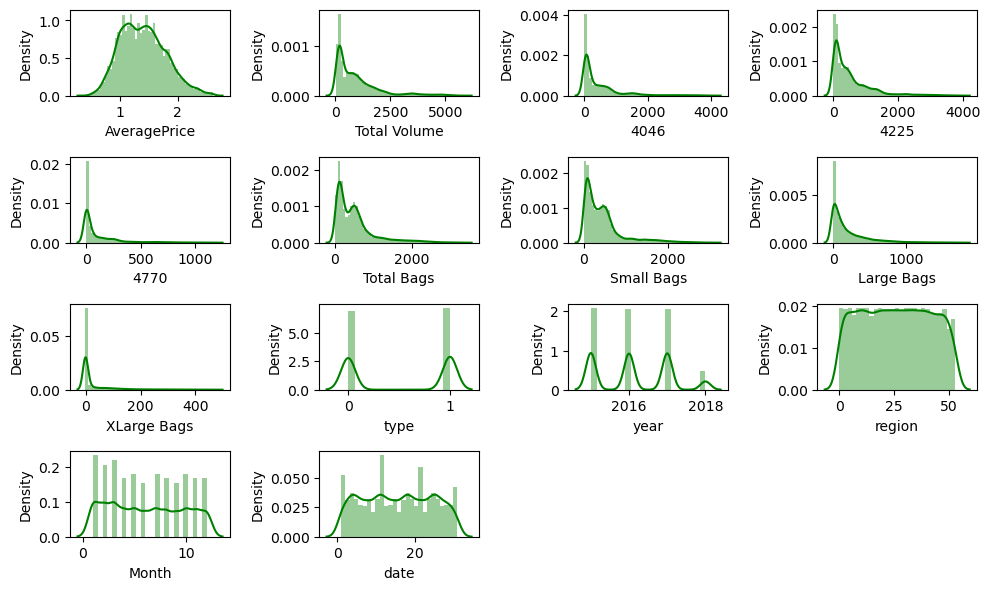

In [61]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in df1:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df1[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above we can see that the skewness has been substantially removed and the data is normally distributed.

In [62]:
#x and y for Target Variable "AveragePrice"
x=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']

In [63]:
#Scaling x
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,date
0,-0.426431,-0.612737,-0.103508,-0.519576,-0.625268,-0.538933,-0.686243,-0.425191,-1.019047,-1.210013,-1.695495,1.644612,1.289309
1,-0.465178,-0.632201,-0.175051,-0.511888,-0.608716,-0.520588,-0.684609,-0.425191,-1.019047,-1.210013,-1.695495,1.644612,0.491652
2,-0.243949,-0.625256,0.210912,-0.470165,-0.637002,-0.552249,-0.682487,-0.425191,-1.019047,-1.210013,-1.695495,1.644612,-0.306004
3,-0.370694,-0.608217,0.009685,-0.502169,-0.691743,-0.614256,-0.671879,-0.425191,-1.019047,-1.210013,-1.695495,1.644612,-1.103660
4,-0.482014,-0.617468,-0.181218,-0.500122,-0.682345,-0.605505,-0.653105,-0.425191,-1.019047,-1.210013,-1.695495,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.674322,-0.571990,-0.733014,-0.596050,-0.535755,-0.445664,-0.602531,-0.425191,0.981309,1.980756,1.747054,-1.180379,-1.331562
17647,-0.700212,-0.605482,-0.669905,-0.596050,-0.613567,-0.531161,-0.623291,-0.425191,0.981309,1.980756,1.747054,-1.462878,1.403260
17648,-0.701253,-0.605472,-0.699244,-0.298734,-0.610954,-0.521845,-0.709962,-0.425191,0.981309,1.980756,1.747054,-1.462878,0.605603
17649,-0.681128,-0.591226,-0.682803,-0.298924,-0.580453,-0.488129,-0.705699,-0.425191,0.981309,1.980756,1.747054,-1.462878,-0.192053


In [64]:
x.isnull().sum()

Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
date            0
dtype: int64

In [65]:
dfcorr=df1.corr()

In [66]:
dfcorr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.613150
Month           0.149502
year            0.091704
date            0.026819
region         -0.003242
XLarge Bags    -0.246919
4225           -0.383075
4770           -0.387621
Large Bags     -0.404012
Small Bags     -0.409643
Total Bags     -0.447396
Total Volume   -0.477348
4046           -0.486646
Name: AveragePrice, dtype: float64

In [67]:
#x and y for Target Variable "AveragePrice"
x=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']

In [68]:
print(x.shape)
print(y.shape)

(17651, 13)
(17651,)


In [69]:
#Checking VIF for x
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Total Volume,726.514980
1,4046,78.115517
2,4225,128.922581
3,4770,3.781930
4,Total Bags,520.098913
5,Small Bags,281.264003
6,Large Bags,29.318775
7,XLarge Bags,2.268724
8,type,3.567009
9,year,16.951131


Here we can see that VIF for Total Volume is highest 726. So we will drop Total Volume

In [ ]:
x.drop("Total Volume",axis=1, inplace= True)
x.drop('Total Bags',axis=1, inplace=True)

Now we will again check vif

In [75]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,4046,5.111486
1,4225,8.585296
2,4770,3.659662
3,Small Bags,11.600079
4,Large Bags,3.123252
5,XLarge Bags,2.158752
6,type,3.487299
7,year,14.910909
8,region,4.201555
9,Month,4.056743


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [76]:
#Now we find the best random state with x and y
maxRS=0
maxaccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Maximum r2 score is ",maxaccu, "at random state ",maxRS)

Maximum r2 score is  0.5008796144490021 at random state  106


Now we will again do train test split with maxRS

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [78]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_Score : ",r2_score(y_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_LR)) )

LinearRegression()
R2_Score :  0.5008796144490021
R2_Score on Training Data : 0.4675457294073938
Mean Absolute Error: 0.21531900668538442
Mean Squared Error: 0.07539355969520196
Root Mean Squared Error: 0.27457887700113054


In [79]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_Score : ",r2_score(y_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)) )


RandomForestRegressor()
R2_Score :  0.8797687638622508
R2_Score on Training Data : 0.983283777925726
Mean Absolute Error: 0.0949574584592145
Mean Squared Error: 0.01816127159176737
Root Mean Squared Error: 0.13476376216092875


In [80]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print(KNR)
print("R2_Score : ",r2_score(y_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_KNR)) )

KNeighborsRegressor()
R2_Score :  0.7733989807416219
R2_Score on Training Data : 0.8491947945865403
Mean Absolute Error: 0.12658987915407857
Mean Squared Error: 0.03422873111782477
Root Mean Squared Error: 0.18501008382740863


In [81]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_Score : ",r2_score(y_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.7409743075783255
R2_Score on Training Data : 0.747942375565134
Mean Absolute Error: 0.15129230972056043
Mean Squared Error: 0.039126570602052005
Root Mean Squared Error: 0.19780437457764175


In [82]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_Score : ",r2_score(y_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_svr)) )

SVR()
R2_Score :  0.49238955521330197
R2_Score on Training Data : 0.48709084756693233
Mean Absolute Error: 0.21262656482581285
Mean Squared Error: 0.0766760073898517
Root Mean Squared Error: 0.27690432894747546


In [83]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_Score : ",r2_score(y_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)) )


Lasso()
R2_Score :  0.2744976413523317
R2_Score on Training Data : 0.2510129878946691
Mean Absolute Error: 0.2691305775585315
Mean Squared Error: 0.10958920326471816
Root Mean Squared Error: 0.3310426003775317


In [84]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print(ridge)
print("R2_Score : ",r2_score(y_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ridge)) )


Ridge()
R2_Score :  0.500875472699195
R2_Score on Training Data : 0.4675456747464676
Mean Absolute Error: 0.21532112824626776
Mean Squared Error: 0.07539418531833891
Root Mean Squared Error: 0.27458001623996403


In [85]:
EN=ElasticNet()
EN.fit(x_train,y_train)
pred_EN=EN.predict(x_test)
pred_train=EN.predict(x_train)
print(EN)
print("R2_Score : ",r2_score(y_test,pred_EN))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_EN))
print("Mean Squared Error:", mean_squared_error(y_test,pred_EN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_EN)) )


ElasticNet()
R2_Score :  0.2767391367525419
R2_Score on Training Data : 0.2539103339088836
Mean Absolute Error: 0.26862803285678877
Mean Squared Error: 0.10925061898294071
Root Mean Squared Error: 0.33053081396889566


In [86]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_Score : ",r2_score(y_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_dtr)) )


DecisionTreeRegressor()
R2_Score :  0.7452198327273817
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.12874244712990934
Mean Squared Error: 0.03848527190332326
Root Mean Squared Error: 0.19617663444794659


In [87]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
pred_train=ad.predict(x_train)
print(ad)
print("R2_Score : ",r2_score(y_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.5592374752739533
R2_Score on Training Data : 0.5593444849201811
Mean Absolute Error: 0.20826872992210485
Mean Squared Error: 0.0665784381510616
Root Mean Squared Error: 0.25802797939576555


In [88]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
pred_train=br.predict(x_train)
print(br)
print("R2_Score : ",r2_score(y_test,pred_br))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_br)))

BaggingRegressor()
R2_Score :  0.862186635188811
R2_Score on Training Data : 0.9737536500683398
Mean Absolute Error: 0.10122092145015106
Mean Squared Error: 0.020817102341389726
Root Mean Squared Error: 0.14428133053652412


In [89]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print("R2_Score : ",r2_score(y_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.9058973965689412
R2_Score on Training Data : 1.0
Mean Absolute Error: 0.08217146903323261
Mean Squared Error: 0.014214466999622356
Root Mean Squared Error: 0.11922443960708037


In [91]:
R2_score=pd.DataFrame([['RFR',r2_score(y_test,pred_RFR)],['LR',r2_score(y_test,pred_LR)],['KNR',r2_score(y_test,pred_KNR)],['GBR',r2_score(y_test,pred_GBR)],['SVR',r2_score(y_test,pred_svr)],['lasso',r2_score(y_test,pred_lasso)],['Ridge',r2_score(y_test,pred_ridge)],['Elastinet',r2_score(y_test,pred_EN)],['DTR',r2_score(y_test,pred_dtr)],['Adaboost',r2_score(y_test,pred_ad)],['Bagging',r2_score(y_test,pred_br)],['ETR',r2_score(y_test,pred_etr)]],columns=['Model','R2_Score'])
R2_score

,Model,R2_Score
0,RFR,0.879769
1,LR,0.500880
2,KNR,0.773399
3,GBR,0.740974
4,SVR,0.492390
5,lasso,0.274498
6,Ridge,0.500875
7,Elastinet,0.276739
8,DTR,0.745220
9,Adaboost,0.559237


Above we can clearly see that we are getting 90.58% r2 score with Extra Trees Regressor

In [93]:
#Now we will check all models with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y_test,pred_LR)-score_LR.mean())*100)

0.5008796144490021
[-0.3014445   0.23555677  0.33665889  0.03346191  0.10318528]
0.08148367158504297
Difference between r2 score and Cross Val Score for Linear regression is : 41.93959428639591


In [111]:
score_RFR=cvs(RFR,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y_test,pred_RFR)-score_RFR.mean())*100)

0.8797687638622508
[-0.02599018  0.48575705  0.42595528  0.44587304  0.45027876  0.38376031
  0.44302654  0.52431524  0.38695816  0.26589513]
0.37858293304356805
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 50.11858308186827


In [110]:
score_KNR=cvs(KNR,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_KNR))
print(score_KNR)
print(score_KNR.mean())
print("Difference between r2 score and Cross Val Score for KNeighborsRegressor is :", (r2_score(y_test,pred_KNR)-score_KNR.mean())*100)

0.7733989807416219
[-0.35655196 -0.05654432  0.16446034  0.22586636  0.18160298  0.03755345
  0.07344283  0.31157502  0.1204939  -0.22110342]
0.04807951745139274
Difference between r2 score and Cross Val Score for KNeighborsRegressor is : 72.53194632902293


In [109]:
score_GBR=cvs(GBR,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y_test,pred_GBR)-score_GBR.mean())*100)

0.7409743075783255
[0.03530925 0.50084681 0.51492006 0.54649509 0.51030268 0.3982839
 0.42226071 0.44363864 0.44409165 0.33982474]
0.41559735276517085
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 32.53769548131547


In [97]:
score_svr=cvs(svr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y_test,pred_svr)-score_svr.mean())*100)

0.49238955521330197
[-0.95397219  0.17050989  0.50420123  0.08207317 -0.18675893]
-0.07678936647657549
Difference between r2 score and Cross Val Score for SVR is : 56.91789216898775


In [98]:
score_lasso=cvs(lasso,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y_test,pred_lasso)-score_lasso.mean())*100)

0.2744976413523317
[-2.27200082 -0.18969145  0.26758716 -0.05144938 -0.31064705]
-0.5112403093818182
Difference between r2 score and Cross Val Score for Lasso is : 78.57379507341498


In [99]:
score_ridge=cvs(ridge,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y_test,pred_ridge)-score_ridge.mean())*100)

0.500875472699195
[-0.30181061  0.23569612  0.33651017  0.03356837  0.10325726]
0.08144426105684659
Difference between r2 score and Cross Val Score for Ridge is : 41.94312116423484


In [100]:
score_EN=cvs(EN,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_EN))
print(score_EN)
print(score_EN.mean())
print("Difference between r2 score and Cross Val Score for ElasticNet is :", (r2_score(y_test,pred_EN)-score_EN.mean())*100)

0.2767391367525419
[-2.25914363 -0.19621534  0.26841976 -0.05210067 -0.31962372]
-0.5117327211100172
Difference between r2 score and Cross Val Score for ElasticNet is : 78.84718578625592


In [108]:
score_dtr=cvs(dtr,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y_test,pred_dtr)-score_dtr.mean())*100)

0.7452198327273817
[-0.90219408 -0.09459753 -0.09725172  0.127143    0.25504424 -0.27775929
 -0.1515835  -0.12328598 -0.03568197 -0.28903847]
-0.15892052946501872
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 90.41403621924005


In [107]:
score_ad=cvs(ad,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y_test,pred_ad)-score_ad.mean())*100)

0.5592374752739533
[-1.08319881 -0.0364167   0.1656641   0.26807374  0.40043796  0.1741633
  0.15487884  0.17237092  0.29785818  0.20101642]
0.07148479499818156
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : 48.77526802757718


In [106]:
score_br=cvs(br,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y_test,pred_br)-score_br.mean())*100)

0.862186635188811
[0.17014934 0.46578334 0.36867761 0.40569648 0.46651289 0.31220279
 0.34694597 0.50758433 0.35489236 0.21959134]
0.36180364547301563
Difference between r2 score and Cross Val Score for BaggingRegressor is : 50.03829897157954


In [105]:
score_etr=cvs(etr,x,y,cv=10,scoring='r2')
print(r2_score(y_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y_test,pred_etr)-score_etr.mean())*100)

0.9058973965689412
[0.39118329 0.52551206 0.48903347 0.42766306 0.55273917 0.42450523
 0.49827125 0.41989896 0.49987535 0.32982814]
0.4558509992147336
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 45.00463973542076


 As we can see above that Extra Tree Regressor is the best model as it has the highest r2 score,it has highest cv score, and difference between r2 score and cv score is quite less as compared to other models.

Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
params={"n_estimators":[100,200,300],"random_state":[20,40,60,80,100,None],"max_depth":[None,0,1,2,3]}

In [114]:
GCV=GridSearchCV(etr,params,cv=10)

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 0, 1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'random_state': [20, 40, 60, 80, 100, None]})

In [117]:
GCV.best_params_

{'max_depth': None, 'n_estimators': 300, 'random_state': 100}

In [127]:
Final_model_price=ExtraTreesRegressor(n_estimators=300,random_state=100,max_depth= None)
Final_model_price.fit(x_train,y_train)
finalpred_price=Final_model_price.predict(x_test)
print("R2_Score : ",r2_score(y_test,finalpred_price))
print("Mean Absolute Error:", mean_absolute_error(y_test,finalpred_price))
print("Mean Squared Error:", mean_squared_error(y_test,finalpred_price))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,finalpred_price)))

R2_Score :  0.9062442386997526
Mean Absolute Error: 0.08182223061430012
Mean Squared Error: 0.014162075505203094
Root Mean Squared Error: 0.11900451884362667


In [128]:
Final_model_price=ExtraTreesRegressor(n_estimators=300,random_state=106,max_depth= None)
Final_model_price.fit(x_train,y_train)
finalpred_price=Final_model_price.predict(x_test)
print("R2_Score : ",r2_score(y_test,finalpred_price))
print("Mean Absolute Error:", mean_absolute_error(y_test,finalpred_price))
print("Mean Squared Error:", mean_squared_error(y_test,finalpred_price))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,finalpred_price)))

R2_Score :  0.9075152966588963
Mean Absolute Error: 0.08118553625377645
Mean Squared Error: 0.013970078570409543
Root Mean Squared Error: 0.11819508691316041


Here we can see that we are getting the best R2 Score at random state 106 rather than 100

SAVING BEST MODEL

In [129]:
import pickle
filename1='Avocado Price Prediction.pkl'
pickle.dump(Final_model_price,open(filename1,'wb'))
loaded_model1=pickle.load(open('Avocado Price Prediction.pkl','rb'))
result=loaded_model1.score(x_test,y_test)
print(result*100)

90.75152966588963


In [130]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [131]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
Predicted,1.879067,1.198833,1.1669,1.185233,1.3187,1.1592,1.274667,1.451833,0.9246,1.075133,...,1.452733,0.7814,1.448567,1.832767,2.1027,1.161433,1.3543,1.137067,1.2878,1.734733
Original,1.940000,1.270000,0.9900,1.200000,1.3800,1.1900,1.170000,1.500000,0.8800,1.020000,...,1.520000,0.6500,1.530000,1.820000,2.0600,1.230000,1.4900,0.990000,1.4600,1.580000


We can see that our predicted score is very close to the original score

# REGION PREDICTION

In [116]:
#x and y for Target Variable "region"
x1=df1.drop('region',axis=1)
y1=df1['region']

In [132]:
#Checking VIF for x1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,AveragePrice,27.806314
1,Total Volume,724.881579
2,4046,76.511573
3,4225,130.072280
4,4770,3.763680
5,Total Bags,532.335167
6,Small Bags,291.670782
7,Large Bags,29.824883
8,XLarge Bags,2.303220
9,type,4.638726


In [133]:
x1.drop("Total Volume",axis=1, inplace= True)
x1.drop('Total Bags',axis=1, inplace=True)

In [134]:
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,VIF Values
0,AveragePrice,26.422984
1,4046,5.108975
2,4225,8.728004
3,4770,3.637367
4,Small Bags,11.572301
5,Large Bags,3.182355
6,XLarge Bags,2.171707
7,type,4.621048
8,year,27.907824
9,Month,4.224598


In [135]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [136]:
#finding best random state 
maxAccu1=0
maxRS1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x1_train,y1_train)
    pred=RFR.predict(x1_test)
    accu1=accuracy_score(y1_test,pred)
    if accu1>maxAccu1:
        maxAccu1=accu1
        maxRS1=i
print("Best Accuracy is",maxAccu1,"at random state", maxRS1)

Best Accuracy is 0.9210725075528701 at random state 50


Creating train_test_split

In [137]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS1)

RANDOM FOREST CLASSIFIER

In [138]:
RFC=RandomForestClassifier()
RFC.fit(x1_train,y1_train)
predRFC=RFC.predict(x1_test)
predRFC
print(accuracy_score(y1_test,predRFC))
print(confusion_matrix(y1_test,predRFC))
print(classification_report(y1_test,predRFC))

0.9172960725075529
[[89  0  0 ...  0  0  0]
 [ 0 83  0 ...  0  0  1]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 69]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       103
         1.0       0.90      0.81      0.86       102
         2.0       0.97      0.99      0.98        93
         3.0       0.92      0.81      0.86        95
         4.0       0.97      1.00      0.99       106
         5.0       0.90      0.89      0.89        90
         6.0       0.98      0.99      0.98        92
         7.0       0.89      0.89      0.89       102
         8.0       1.00      1.00      1.00       105
         9.0       0.88      0.94      0.91        96
        10.0       0.88      0.94      0.91       103
        11.0       0.98      0.96      0.97       115
        12.0       0.95      0.97      0.96       106
        13.0       0.89      0.86      0.88       110
        14.0  

OBS: The accuracy score using Random Forest Classifier is 91.72%

LOGISTIC REGRESSION

In [139]:
LR=LogisticRegression()
LR.fit(x1_train,y1_train)
predLR=LR.predict(x1_test)
predLR
print(accuracy_score(y1_test,predLR))
print(confusion_matrix(y1_test,predLR))
print(classification_report(y1_test,predLR))

0.25472054380664655
[[23  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  2  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 35 19  0]
 [ 0  1  0 ...  5 25  0]
 [ 0  0  0 ...  0  0 17]]
              precision    recall  f1-score   support

         0.0       0.10      0.22      0.14       103
         1.0       0.17      0.12      0.14       102
         2.0       0.50      0.34      0.41        93
         3.0       0.12      0.39      0.18        95
         4.0       0.38      0.26      0.31       106
         5.0       0.12      0.31      0.17        90
         6.0       0.52      0.29      0.38        92
         7.0       0.41      0.34      0.37       102
         8.0       0.59      0.55      0.57       105
         9.0       0.35      0.44      0.39        96
        10.0       0.38      0.10      0.16       103
        11.0       0.10      0.08      0.09       115
        12.0       0.35      0.32      0.33       106
        13.0       0.63      0.38      0.47       110
        14.0 

The accuracy score with Logistic regression is 25.47%

KNN CLASSIFIER

In [146]:
KNN=KNeighborsClassifier()
KNN.fit(x1_train,y1_train)
predKNN=KNN.predict(x1_test)
predKNN
print(accuracy_score(y1_test,predKNN))
print(confusion_matrix(y1_test,predKNN))
print(classification_report(y1_test,predKNN))

0.8126888217522659
[[82  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  1]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  3  0 ...  0  0 60]]
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73       103
         1.0       0.68      0.72      0.70       102
         2.0       0.92      0.95      0.93        93
         3.0       0.77      0.80      0.78        95
         4.0       0.89      0.92      0.91       106
         5.0       0.65      0.69      0.67        90
         6.0       0.91      0.92      0.92        92
         7.0       0.85      0.92      0.88       102
         8.0       0.93      0.96      0.94       105
         9.0       0.75      0.82      0.78        96
        10.0       0.73      0.83      0.78       103
        11.0       0.82      0.90      0.86       115
        12.0       0.92      0.75      0.82       106
        13.0       0.78      0.81      0.79       110
        14.0  

The accuracy score with KNeighborsClassifier is 81.26%

SUPPORT VECTOR MACHINE CLASSIFIER

In [147]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc=svc.predict(x1_test)
predsvc
print(accuracy_score(y1_test,predsvc))
print(confusion_matrix(y1_test,predsvc))
print(classification_report(y1_test,predsvc))

0.3800981873111782
[[30  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  2  1]
 [ 0  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  3  0 ...  0  0 34]]
              precision    recall  f1-score   support

         0.0       0.28      0.29      0.28       103
         1.0       0.31      0.41      0.36       102
         2.0       0.88      0.41      0.56        93
         3.0       0.22      0.42      0.29        95
         4.0       0.85      0.48      0.61       106
         5.0       0.27      0.38      0.31        90
         6.0       0.93      0.45      0.60        92
         7.0       0.90      0.27      0.42       102
         8.0       0.95      0.50      0.65       105
         9.0       0.43      0.39      0.40        96
        10.0       0.58      0.33      0.42       103
        11.0       0.83      0.35      0.49       115
        12.0       0.75      0.50      0.60       106
        13.0       0.94      0.41      0.57       110
        14.0  

The accuracy score with SVC is 38.08%

DECISION TREE CLASSIFIER

In [148]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
preddtc=dtc.predict(x1_test)
preddtc
print(accuracy_score(y1_test,preddtc))
print(confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))

0.7922960725075529
[[70  0  0 ...  0  0  0]
 [ 0 73  0 ...  0  0  2]
 [ 0  0 82 ...  0  0  2]
 ...
 [ 0  0  0 ... 60  1  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  2  0 ...  0  0 59]]
              precision    recall  f1-score   support

         0.0       0.80      0.68      0.74       103
         1.0       0.72      0.72      0.72       102
         2.0       0.87      0.88      0.88        93
         3.0       0.77      0.74      0.75        95
         4.0       0.90      0.89      0.90       106
         5.0       0.64      0.81      0.72        90
         6.0       0.93      0.90      0.92        92
         7.0       0.82      0.84      0.83       102
         8.0       0.90      0.91      0.91       105
         9.0       0.81      0.82      0.81        96
        10.0       0.69      0.71      0.70       103
        11.0       0.92      0.88      0.90       115
        12.0       0.83      0.80      0.82       106
        13.0       0.75      0.79      0.77       110
        14.0  

The accuracy score with DTC is 79.22%

ADABOOST CLASSIFIER

In [149]:
ad=AdaBoostClassifier()
ad.fit(x1_train,y1_train)
predad=ad.predict(x1_test)
predad
print(accuracy_score(y1_test,predad))
print(confusion_matrix(y1_test,predad))
print(classification_report(y1_test,predad))

0.08006042296072508
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  4]
 [ 0  0 38 ...  2  0  0]
 ...
 [ 0  0 25 ... 36  0  0]
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  4  0 36]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       103
         1.0       0.00      0.00      0.00       102
         2.0       0.09      0.41      0.15        93
         3.0       0.00      0.00      0.00        95
         4.0       0.07      0.11      0.09       106
         5.0       0.00      0.00      0.00        90
         6.0       0.00      0.00      0.00        92
         7.0       0.00      0.00      0.00       102
         8.0       0.00      0.00      0.00       105
         9.0       0.00      0.00      0.00        96
        10.0       0.00      0.00      0.00       103
        11.0       0.00      0.00      0.00       115
        12.0       0.25      0.02      0.04       106
        13.0       0.00      0.00      0.00       110
        14.0 

The accuracy score with AdaBoost Classifier is 8%

GRADIENT BOOSTING CLASSIFIER

In [150]:
gb=GradientBoostingClassifier()
gb.fit(x1_train,y1_train)
predgb=gb.predict(x1_test)
predgb
print(accuracy_score(y1_test,predgb))
print(confusion_matrix(y1_test,predgb))
print(classification_report(y1_test,predgb))

0.8385574018126888
[[83  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  1]
 [ 0  0 87 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  3  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 63]]
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       103
         1.0       0.73      0.71      0.72       102
         2.0       0.96      0.94      0.95        93
         3.0       0.82      0.73      0.77        95
         4.0       0.91      0.90      0.90       106
         5.0       0.72      0.74      0.73        90
         6.0       0.97      0.92      0.94        92
         7.0       0.83      0.87      0.85       102
         8.0       0.98      0.95      0.97       105
         9.0       0.87      0.89      0.88        96
        10.0       0.71      0.80      0.75       103
        11.0       0.90      0.90      0.90       115
        12.0       0.93      0.88      0.90       106
        13.0       0.86      0.80      0.83       110
        14.0  

The accuracy score with Gradient Boosting Classifier is 83.85%

BAGGING CLASSIFIER

In [151]:
BC=BaggingClassifier()
BC.fit(x1_train,y1_train)
predBC=BC.predict(x1_test)
predBC
print(accuracy_score(y1_test,predBC))
print(confusion_matrix(y1_test,predBC))
print(classification_report(y1_test,predBC))

0.864237160120846
[[77  0  0 ...  0  0  0]
 [ 0 80  0 ...  0  0  0]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  0  0 ...  0  0 61]]
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       103
         1.0       0.78      0.78      0.78       102
         2.0       0.96      0.98      0.97        93
         3.0       0.82      0.79      0.80        95
         4.0       0.94      0.94      0.94       106
         5.0       0.73      0.88      0.80        90
         6.0       0.98      0.99      0.98        92
         7.0       0.85      0.86      0.85       102
         8.0       0.97      0.97      0.97       105
         9.0       0.81      0.91      0.86        96
        10.0       0.78      0.88      0.83       103
        11.0       0.96      0.94      0.95       115
        12.0       0.87      0.89      0.88       106
        13.0       0.88      0.82      0.85       110
        14.0   

The accuracy score with Bagging Classifier is 86.42%

EXTRA TREES CLASSIFIER

In [152]:
ET=ExtraTreesClassifier()
ET.fit(x1_train,y1_train)
predET=ET.predict(x1_test)
predET
print(accuracy_score(y1_test,predET))
print(confusion_matrix(y1_test,predET))
print(classification_report(y1_test,predET))

0.9342900302114804
[[95  0  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  1]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 74]]
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       103
         1.0       0.87      0.85      0.86       102
         2.0       0.98      1.00      0.99        93
         3.0       0.93      0.84      0.88        95
         4.0       0.99      1.00      1.00       106
         5.0       0.92      0.91      0.92        90
         6.0       0.97      1.00      0.98        92
         7.0       0.94      0.96      0.95       102
         8.0       1.00      1.00      1.00       105
         9.0       0.88      0.93      0.90        96
        10.0       0.89      0.93      0.91       103
        11.0       0.97      0.97      0.97       115
        12.0       0.97      0.99      0.98       106
        13.0       0.92      0.88      0.90       110
        14.0  

The accuracy score with Extra Trees Classifier is 93.42%

In [155]:
accuracy=pd.DataFrame([['RFC',accuracy_score(y1_test,predRFC)],['LR',accuracy_score(y1_test,predLR)],['KNN',accuracy_score(y1_test,predKNN)],['SVC',accuracy_score(y1_test,predsvc)],['DTC',accuracy_score(y1_test,preddtc)],['Adaboost',accuracy_score(y1_test,predad)],['Gradient Boosting',accuracy_score(y1_test,predgb)],['Bagging',accuracy_score(y1_test,predBC)],['ETC',accuracy_score(y1_test,predET)]],columns=['Model','Accuracy'])
accuracy

,Model,Accuracy
0,RFC,0.917296
1,LR,0.254721
2,KNN,0.812689
3,SVC,0.380098
4,DTC,0.792296
5,Adaboost,0.080060
6,Gradient Boosting,0.838557
7,Bagging,0.864237
8,ETC,0.934290


Here we can see that the Extra Trees Classifier has highest accuracy. We will further validate with Cross Val Score

CROSS VALIDATION SCORE

In [156]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predRFC)-score.mean())

[0.67629567 0.80509915 0.77308782 0.70113314 0.49150142]
0.689423439338983
0.10941954231076476
Difference between Accuracy Score and Cross Validation Score is :  0.22787263316856987


In [157]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predLR)-score.mean())

[0.25375248 0.31189802 0.17733711 0.0490085  0.04560907]
0.16752103385393474
0.10703707742494582
Difference between Accuracy Score and Cross Validation Score is :  0.0871995099527118


In [159]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predKNN)-score.mean())

[0.58057208 0.72889518 0.61813031 0.51133144 0.37677054]
0.5631399109305439
0.11680778688174077
Difference between Accuracy Score and Cross Validation Score is :  0.24954891082172193


In [160]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predsvc)-score.mean())

[0.48683093 0.57875354 0.30113314 0.03512748 0.0490085 ]
0.2901707177945562
0.22148667136944034
Difference between Accuracy Score and Cross Validation Score is :  0.089927469516622


In [161]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,preddtc)-score.mean())

[0.49079581 0.67195467 0.61614731 0.52379603 0.4101983 ]
0.5425784251666543
0.09242219378635572
Difference between Accuracy Score and Cross Validation Score is :  0.24971764734089852


In [162]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predad)-score.mean())

[0.03228547 0.03002833 0.05127479 0.08016997 0.05495751]
0.04974321328773157
0.018159138911173902
Difference between Accuracy Score and Cross Validation Score is :  0.030317209672993506


In [165]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y1_test,predET)-score.mean())

[0.70235061 0.79461756 0.7898017  0.70056657 0.50538244]
0.6985437761694678
0.10477410766299117
Difference between Accuracy Score and Cross Validation Score is :  0.23574625404201255


Above we can see that the CV score for Extra Trees Classifier is highest and the difference between CV score and accuracy score is less

HYPERPARAMETER TUNING

In [167]:
params1={"n_estimators":[100,200,300],"criterion":["gini","entropy"],"random_state":[20,40,60,80,100,None],"max_depth":[None,0,1,2,3]}

In [171]:
GCV1=GridSearchCV(ET,params1,cv=5)

In [172]:
GCV1.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 0, 1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'random_state': [20, 40, 60, 80, 100, None]})

In [173]:
GCV1.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 300,
 'random_state': 80}

In [186]:
Final_model_region1=ExtraTreesClassifier(criterion='gini',n_estimators=300,random_state=80,max_depth=None)
Final_model_region1.fit(x1_train,y1_train)
finalpred_region1=Final_model_region1.predict(x1_test)
acc1=accuracy_score(y1_test,finalpred_region1)
print(acc*100)

94.0143504531722


In [187]:
Final_model_region=ExtraTreesClassifier(criterion='gini',n_estimators=300,random_state=85,max_depth=None)
Final_model_region.fit(x1_train,y1_train)
finalpred_region=Final_model_region.predict(x1_test)
acc=accuracy_score(y1_test,finalpred_region)
print(acc*100)

94.0143504531722


Above we can see that with random state 80 we are getting 93.63% accuracy while with random state 85 we are getting 94.014% . hence we will take final model with random state 85

SAVING THE MODEL

In [190]:
import joblib
joblib.dump(Final_model_region,'Avocado Region Prediction.pkl')

['Avocado Region Prediction.pkl']

PREDICTING THE SAVED MODEL

In [191]:
#Lets load the saved model and get predictions
model=joblib.load("Avocado Region Prediction.pkl")

#prediction
prediction=model.predict(x1_test)

In [192]:
a=np.array(y1_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,21.0,21.0
1,38.0,38.0
2,16.0,16.0
3,15.0,15.0
4,40.0,40.0
...,...,...
5291,42.0,42.0
5292,31.0,31.0
5293,33.0,33.0
5294,49.0,49.0


Above we can see that the predicted column is almost same as original column

In [ ]:
#FINISH